In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import easygems.healpix as egh
import cartopy.crs as ccrs
import numpy as np
%run ~/hackathon-2025_project/hk25-AusNode-land/analysis/yll_functions.ipynb

In [2]:

# define paths
datapath = '/g/data/qx55/germany_node/d3hp003.zarr'
file = 'P1D'
zoom = 'z10'

# define the fname
fpath = f'{datapath}/{file}_mean_{zoom}_atm.zarr'

# open the zarr file
ds = xr.open_zarr(fpath).sel(time=slice('2020-03','2021-02'))#.sel(time=ds['time'].dt.month.isin([6, 7, 8]))

# what variables are there in the dataset?
for key, longname in ds.data_vars.items():
    print(f'{key}: {longname.long_name}')

'''
#### some variables of interest ####

hflsd: latent heat flux
hfssd: sensible heat flux
huss: specific humidity in 2m
mrso: Water content of soil layers
orog: surface altitude
pr: precipitation flux
rlds: surface downwelling longwave radiation
rldscs: surface downwelling clear-sky longwave radiation
rlus: surface upwelling longwave radiation
rsds: surface downwelling shortwave radiation
rsdscs: surface downwelling clear-sky shortwave radiation
rsus: surface upwelling shortwave radiation
sftlf: cell area fraction occupied by land including lakes
tas: temperature in 2m
tauu: u-momentum flux at the surface
tauv: v-momentum flux at the surface
ts: surface temperature
uas: zonal wind in 10m
vas: meridional wind in 10m
'''


/home/561/yl1269/.local/lib/python3.10/site-packages/xarray/backends/plugins.py:80: RuntimeWarning: Engine 'cfgrib' loading failed:
Cannot find the ecCodes library
  warnings.warn(f"Engine {name!r} loading failed:\n{ex}", RuntimeWarning)
/home/561/yl1269/.local/lib/python3.10/site-packages/requests/__init__.py:102: RequestsDependencyWarning: urllib3 (1.26.9) or chardet (5.2.0)/charset_normalizer (2.0.12) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({})/charset_normalizer ({}) doesn't match a supported "


clivi: cloud ice path
clt: total cloud cover
clwvi: cloud condensed water path
egpvi: Atmosphere Geopotential Energy Content
einvi: Atmosphere Moist Internal Energy Content
ekhvi: Atmosphere Horizontal Kinetic Energy Content
ekvvi: Atmosphere Vertical Kinetic Energy Content
hflsd: latent heat flux
hfssd: sensible heat flux
hur: relative humidity
hus: Specific humidity
huss: specific humidity in 2m
mrso: Water content of soil layers
o3vi: ozone path
orog: surface altitude
pr: precipitation flux
prs: large-scale precipitation flux (snow)
prw: water vapor path
ps: surface pressure
psl: mean sea level pressure
qall: mass fraction of all hydrometeors in air
rlds: surface downwelling longwave radiation
rldscs: surface downwelling clear-sky longwave radiation
rlus: surface upwelling longwave radiation
rlut: toa outgoing longwave radiation
rlutcs: toa outgoing clear-sky longwave radiation
rsds: surface downwelling shortwave radiation
rsdscs: surface downwelling clear-sky shortwave radiation
rs

'\n#### some variables of interest ####\n\nhflsd: latent heat flux\nhfssd: sensible heat flux\nhuss: specific humidity in 2m\nmrso: Water content of soil layers\norog: surface altitude\npr: precipitation flux\nrlds: surface downwelling longwave radiation\nrldscs: surface downwelling clear-sky longwave radiation\nrlus: surface upwelling longwave radiation\nrsds: surface downwelling shortwave radiation\nrsdscs: surface downwelling clear-sky shortwave radiation\nrsus: surface upwelling shortwave radiation\nsftlf: cell area fraction occupied by land including lakes\ntas: temperature in 2m\ntauu: u-momentum flux at the surface\ntauv: v-momentum flux at the surface\nts: surface temperature\nuas: zonal wind in 10m\nvas: meridional wind in 10m\n'

In [3]:
sm_ann = ds['mrso']
sm_ann
time_step = xr.DataArray(
    np.arange(0, len(sm_ann.time)),
    dims=['time'],
    coords={'time': sm_ann.time})

In [4]:
corr_sm_time=sm_ann.mean(dim='time')*np.nan

for i in np.arange(len(sm_ann.soil_level)):
    sm_ann_lv = sm_ann[:,i,:]
    #print(sm_lv)
    corr_sm_time[i,:]=xr.corr(sm_ann_lv, time_step, dim='time').astype(np.float32)
corr_sm_time

<xarray.DataArray 'mrso' (soil_level: 5, cell: 12582912)>
dask.array<setitem, shape=(5, 12582912), dtype=float32, chunksize=(1, 262144), chunktype=numpy.ndarray>
Coordinates:
  * soil_level  (soil_level) int64 0 0 0 2 6
Dimensions without coordinates: cell

/home/561/yl1269/.local/lib/python3.10/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in divide
  return func(*(_execute_task(a, cache) for a in args))
/home/561/yl1269/.local/lib/python3.10/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in divide
  return func(*(_execute_task(a, cache) for a in args))
/home/561/yl1269/.local/lib/python3.10/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in divide
  return func(*(_execute_task(a, cache) for a in args))
/home/561/yl1269/.local/lib/python3.10/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in divide
  return func(*(_execute_task(a, cache) for a in args))
/home/561/yl1269/.local/lib/python3.10/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


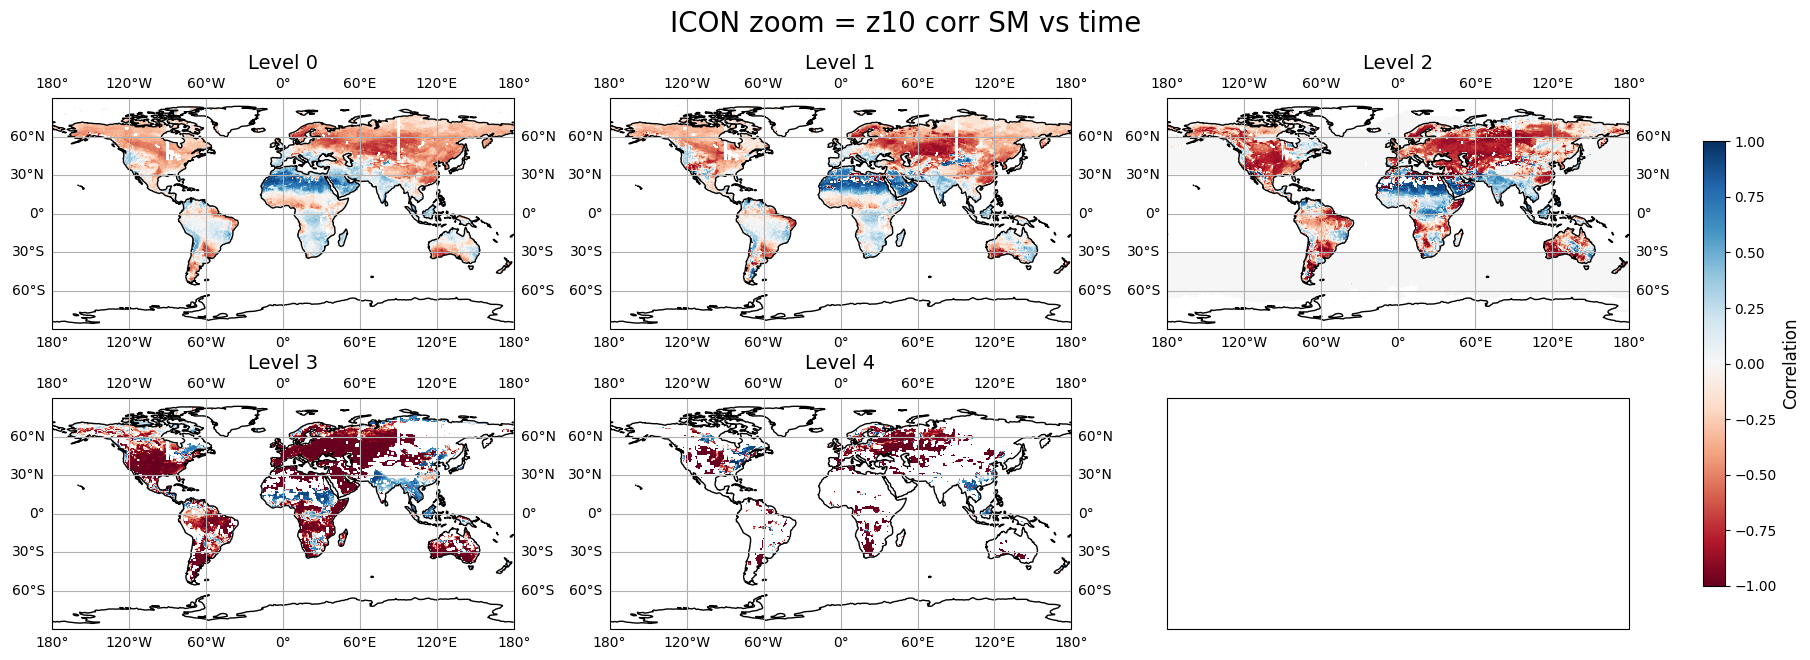

In [5]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

# Close any previous plots
plt.close('all')

# Assuming corr_sm_pr is an xarray.DataArray with dimensions (level, lat, lon)
num_levels = corr_sm_time.sizes['soil_level']

# Create a panel plot with 2 rows and 3 columns for 6 levels
ncols = 3
nrows = 2
fig, axs = plt.subplots(
    nrows=nrows, ncols=ncols, figsize=(18, 6),
    subplot_kw={'projection': ccrs.PlateCarree(central_longitude=0)},
    constrained_layout=True
)

# Flatten axes for easy iteration
axs = axs.ravel()

for i in range(num_levels):
    ax = axs[i]
    ax.set_global()
    im = egh.healpix_show(corr_sm_time.isel(soil_level=i).values, ax=ax, cmap='RdBu', vmin=-1, vmax=1)
    ax.set_title(f'Level {i}', fontsize=14)
    ax.coastlines()
    ax.gridlines(draw_labels=True)

# Add a colorbar to the right of the figure
cbar = fig.colorbar(im, ax=axs, orientation='vertical', shrink=0.8, pad=0.02)
cbar.set_label('Correlation', fontsize=12)

# Optional main title
fig.suptitle(f'ICON zoom = {zoom} corr SM vs time', fontsize=20, y=1.07)

plt.show()